In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import itertools as it
import calcs as c
import pickle
from os.path import exists

In [2]:
def TvM(T_array, mag):
    """
    This function produces the code needed to plot M as a function of T
    for various values of H. The value H is the parameter that is taken
    in here.
    """
    # initialize to all spin up
    matrix = np.ones([10, 10], float)

    # initialize arrays
    E_list = []
    M_list = []

    # loop over stuff
    for k in range(T_array.shape[0]):
        Tmp = T_array[k]
        params = {"dim":10, "kb":1.0, "Temperature":Tmp,
                  "J":1.0, "H":mag, "n_iter":10000, 
                  "matrix":matrix}
        M = c.MCMC(params)[1]

        # make calculations
        avg_M = np.sum(M) / M.shape[0]
        M_list.append(avg_M)

    return np.array(M_list)

In [3]:
M_list = []
T_array = np.array([0.1, 0.5, 1.0, 1.5, 2.0,
                    2.5, 3.0, 3.5, 5.0, 8.0])
#T_array = np.arange(0.1, 8.0, 0.1)
H_list = [0.0, 0.02, 0.1, 0.5]

M = TvM(T_array, 0.0)
M_list.append(M)

M = TvM(T_array, 0.02)
M_list.append(M)

M = TvM(T_array, 0.1)
M_list.append(M)

M = TvM(T_array, 0.5)
M_list.append(M)

with open(f"big_M_list1.pkl", "wb") as f:
    pickle.dump(M_list, f, pickle.HIGHEST_PROTOCOL)

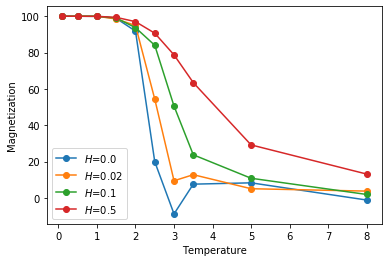

In [4]:
for k in range(4):
    plt.plot(T_array, M_list[k], label="$H$="+str(H_list[k]), ls="-", marker="o")
    plt.ylabel("Magnetization")
    plt.xlabel("Temperature")
plt.legend(loc="lower left")
plt.show()